# 0.0 Imports 

In [33]:
import numpy   as np
import pandas  as pd
import seaborn as sns

import math
import datetime
import warnings
import inflection

from matplotlib           import pyplot as plt
from IPython.display      import Image
from IPython.core.display import HTML


## 0.1 Loading Data

In [2]:
df_store_raw = pd.read_csv('Data/store.csv', low_memory = False )

df_train_raw = pd.read_csv('Data/train.csv' , low_memory = False )

#merge
df_raw = pd.merge( df_train_raw , df_store_raw, how = 'left', on='Store')

## 0.2 Helper Functions 

In [54]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
 
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size'] = 24
  
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
  
    sns.set()

In [55]:
jupyter_settings()
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# 1.0 Data Description

In [5]:
df1 = df_raw.copy()

## 1.1 Rename Columns 

In [6]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [7]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

df1.columns = cols_new

df1.columns


Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 Data Dimensions 

In [8]:
print(" Number of rows {}".format( df1.shape[0] ) )
print(" Number of cols {}".format( df1.shape[1] ) )

 Number of rows 1017209
 Number of cols 18


## 1.3 Data Types 

In [9]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

Let's change the date variable to the datetime type

In [10]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

In [11]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.1 Fillout NA

In **competition distance** I will assume that for NA values it is because there is no competitor around so I will put a much higher value than the maximum.


In [12]:
# competition_distance              
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan( x ) else x )

# competition_open_since_month    
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'] , axis =1 )


# competition_open_since_year     

df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'] , axis =1 )

#promo2_since_week                               
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'] , axis =1 )

# promo2_since_year               
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'] , axis =1 )

# promo_interval                  
month_map = {1:  'Jan', 2:  'Feb',3:  'Mar', 4:  'Apr', 5:  'May', 6:  'Jun', 7:  'Jul', 8:  'Aug', 9:  'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'} 

df1['promo_interval'].fillna(0 , inplace=True)

df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['promo_interval','month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x ['promo_interval'].split( ',' ) else 0 , axis = 1 )






In [13]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

As observed, we treat all NA in dataset

## 1.6 Change Types 

In [14]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )

df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )

df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )



## 1.7 Descriptive Statistical 

In [15]:
num_att = df1.select_dtypes( include = ['int64' , 'float64'] )
cat_att = df1.select_dtypes( exclude = ['int64' , 'float64', 'datetime64[ns]'] )


### 1.7.1 Numerical Attributes 

In [16]:
#central tendency - mean, meadian

ct1 = pd.DataFrame( num_att.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_att.apply( np.median ) ).T

#Dispersion -std, min , max , range , skew ,kurtosis
d1 = pd.DataFrame( num_att.apply( np.std ) ).T
d2 = pd.DataFrame( num_att.apply( min ) ).T
d3 = pd.DataFrame( num_att.apply( max ) ).T
d4 = pd.DataFrame( num_att.apply( lambda x : x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_att.apply( lambda x : x.skew() ) ).T
d6 = pd.DataFrame( num_att.apply( lambda x : x.kurtosis() ) ).T


#concat
m = pd.concat( [d2 , d3 , d4,ct1 , ct2 ,d1,d5 ,d6]).T.reset_index()
m.columns = ['attributes' , 'min' , 'max' , 'range' ,'mean' ,'median' , 'std', 'skew' , 'kurtosis']

m


,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


### 1.7.2 Categorical Attributes 

In [17]:
cat_att.apply( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

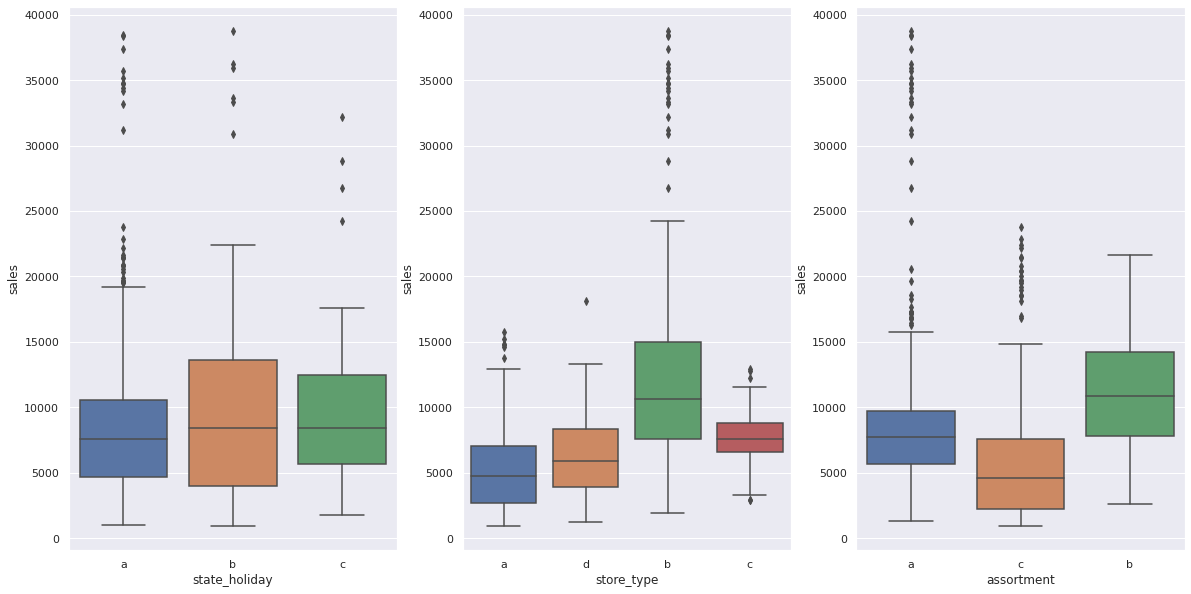

In [18]:
aux1 = df1[(df1['state_holiday'] != '0' ) & (df1['sales'] > 0 ) ]

plt.subplot(1 , 3 ,1)
sns.boxplot( x='state_holiday' , y = 'sales' ,data = aux1)

plt.subplot(1 , 3 ,2)
sns.boxplot( x='store_type' , y = 'sales' ,data = aux1)


plt.subplot(1 , 3 ,3)
sns.boxplot( x='assortment' , y = 'sales' ,data = aux1)

**Store Type** = B has the highest median sales and **assortment** = b as well 

# 2.0 Feature Engineering 

In [19]:
df2 = df1.copy()

## 2.1 Mind Map 

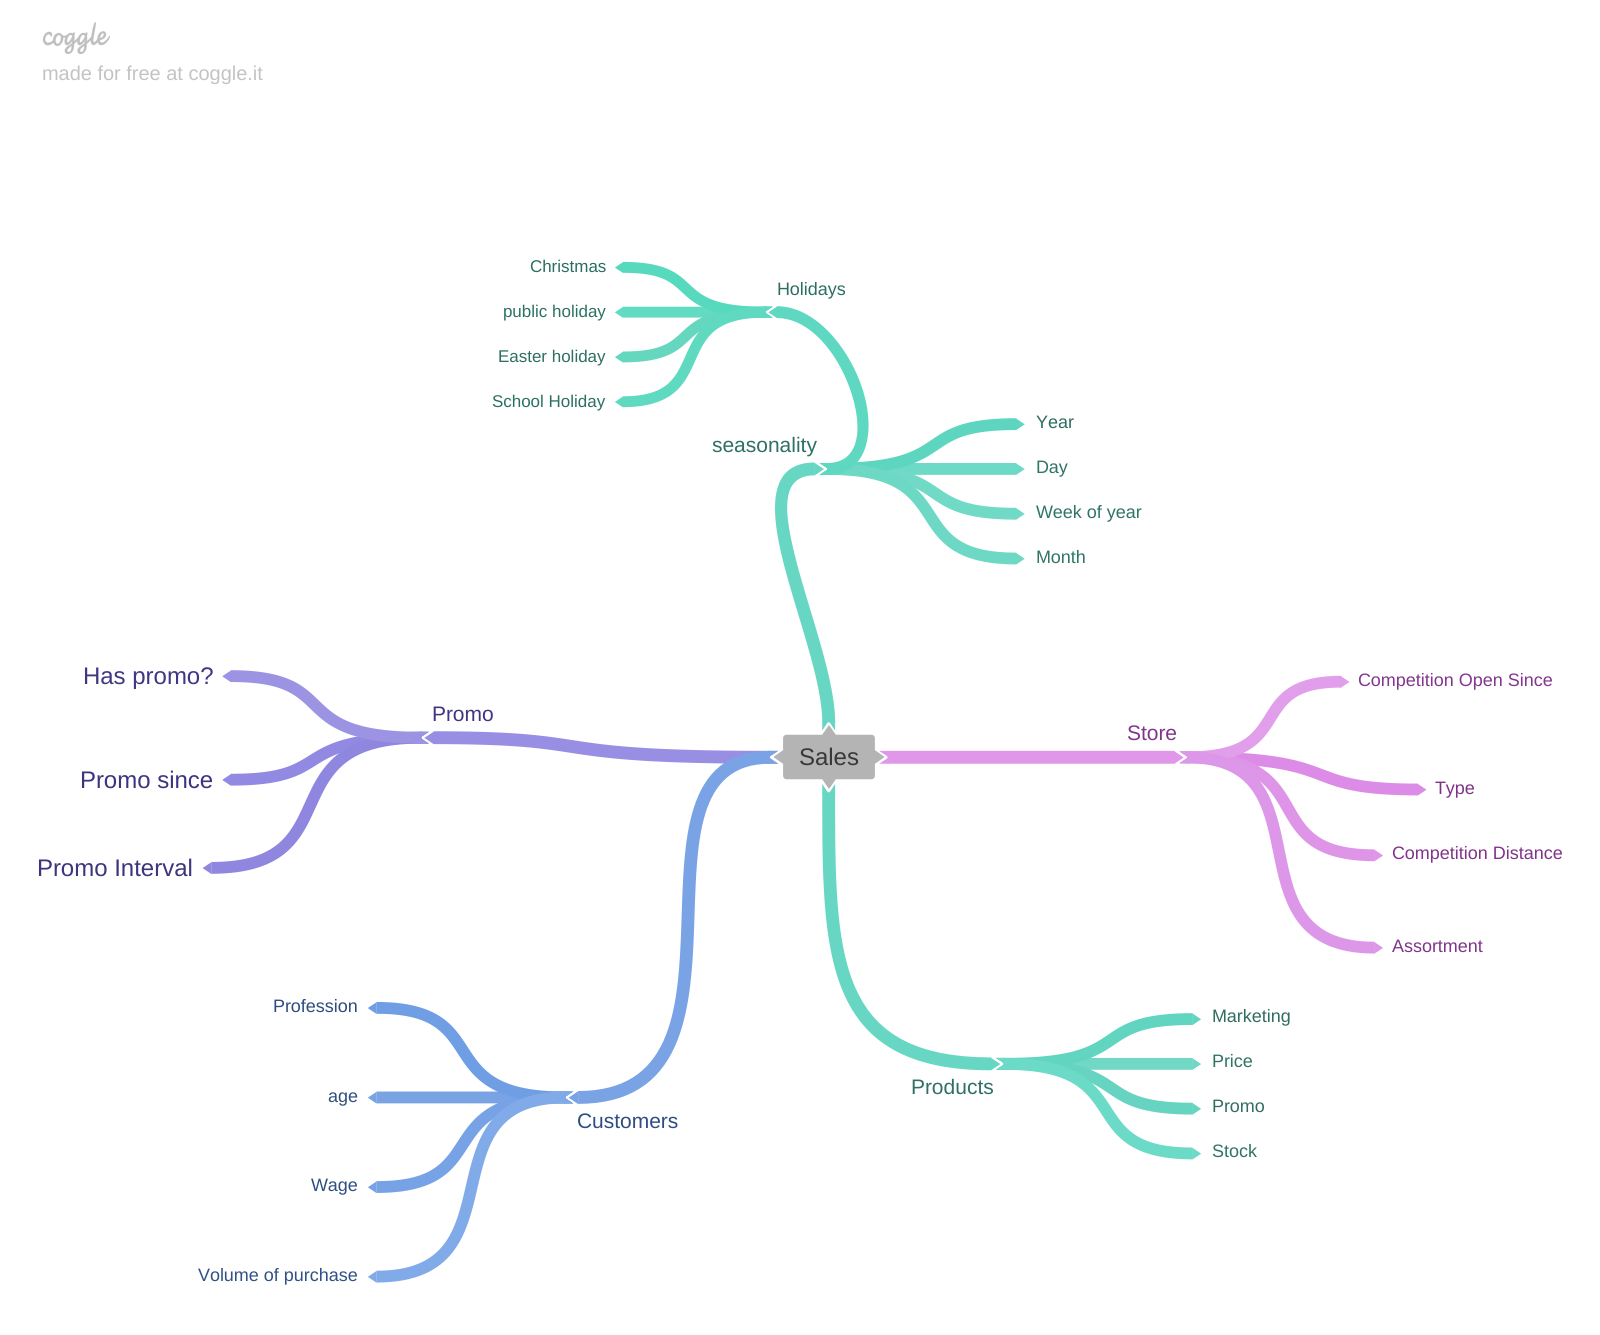

In [20]:

Image(filename='img/Sales.png')

## 2.2 Creating Hypotheses

### 2.2.1 Store Hypotheses

**1.** Stores with a larger number of employees should sell more.

**2.** Stores with a higher inventory capacity should sell more.

**3.** Larger stores should sell more.

**4.** Stores with a larger assortment should sell more.


**5.** Stores with closer competitors should sell less.

**6.** Stores with longer competitors should sell more.

### 2.2.2 Product Hypotheses

**1.** Stores that invest more in Marketing should sell more.

**2.** Stores with greater product exposure should sell more.

**3.** Stores with lower priced products should sell more.

**5.** Stores with more aggressive promotions (bigger discounts), should sell more.

**6.** Stores with active promotions for longer should sell more.

**7.** Stores with more promotion days should sell more.

**8.** Stores with more consecutive promotions should sell more

### 2.2.1 Seasonality Hypotheses

**1.**Stores open during the Christmas holiday should sell more.

**2.**Stores should sell more over the years.

**3.**Stores should sell more in the second half of the year.

**4.**Stores should sell more after the 10th of each month.

**5.**Stores should sell less on weekends.

**6.**Stores should sell less during school holidays.

## 2.3 Final list of hypotheses

**1.** Stores with a larger assortment should sell more.

**2.** Stores with closer competitors should sell less.

**3.** Stores with longer competitors should sell more.

**4.** Stores with active promotions for longer should sell more.

**5.** Stores with more days of promotion should sell more.

**6.** Stores with more consecutive promotions should sell more.




**7.** Stores open during the Christmas holiday should sell more.

**8.** Stores should sell more over the years.

**9.** Stores should sell more in the second half of the year.

**10**. Stores should sell more after the 10th of each month.

**11**. Stores should sell less on weekends.

**12**. Stores should sell less during school holidays.

## 2.4 Feature Engineering

In [21]:
#year
df2['year'] = df2['date'].dt.year
#month

df2['month'] = df2['date'].dt.month
#day
df2['day'] = df2['date'].dt.day

#week of year
df2['week_of_year'] = df2['date'].dt.weekofyear

#year week
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )

#competition since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year=x['competition_open_since_year'], month=x['competition_open_since_month'],day=1 ), axis=1 )
df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30 ).apply( lambda x: x.days ).astype( int )

#promo since
df2['promo_since']     = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
df2['promo_since']     = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days=7 )  )
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] ) / 7 ).apply( lambda x: x.days ).astype( int )

#assortment 
df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

#state holiday

df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' )




<ipython-input-21-8faae46d512f>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.weekofyear


# 3.0 Data Filtering

In [22]:
df3 = df2.copy()

## 3.1 Rows Filtering  

In [23]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]


## 3.2 Columns Filtering  

In [24]:
cols_drop = ['customers', 'open', 'month_map' , 'promo_interval']
df3 = df3.drop( cols_drop, axis=1 )

# 4.0 Exploratory Data Analysis 

In [25]:
df4 = df3.copy()

## 4.1  Univariate Analysis

### 4.1.1 Response Variable 

/home/alexandremagno/.pyenv/versions/3.8.0/envs/rossmann_sales/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


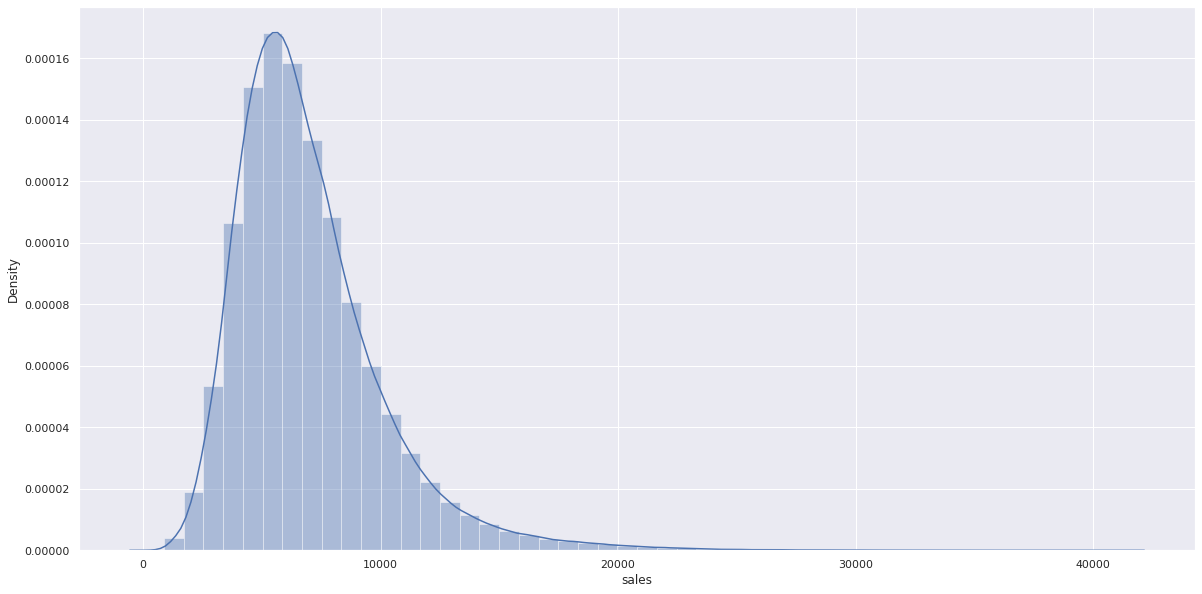

In [26]:
sns.distplot( df4['sales'] );

### 4.1.2 Numerical Variable 

/home/alexandremagno/.pyenv/versions/3.8.0/envs/rossmann_sales/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


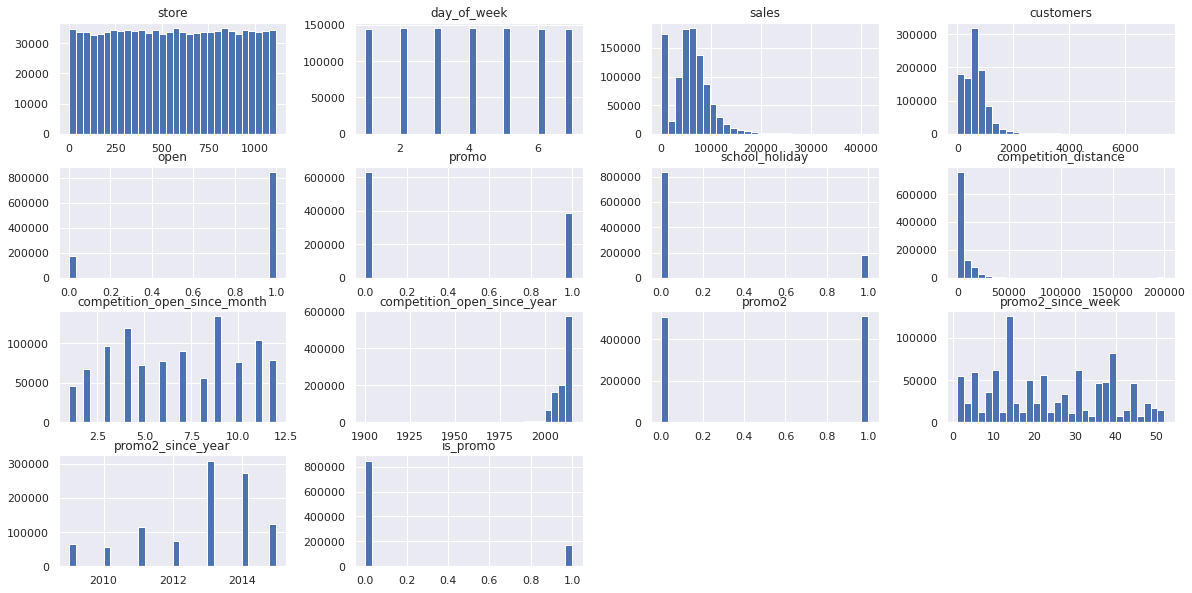

In [27]:
num_att.hist( bins = 30 );

### 4.1.3 Categorical Variable 

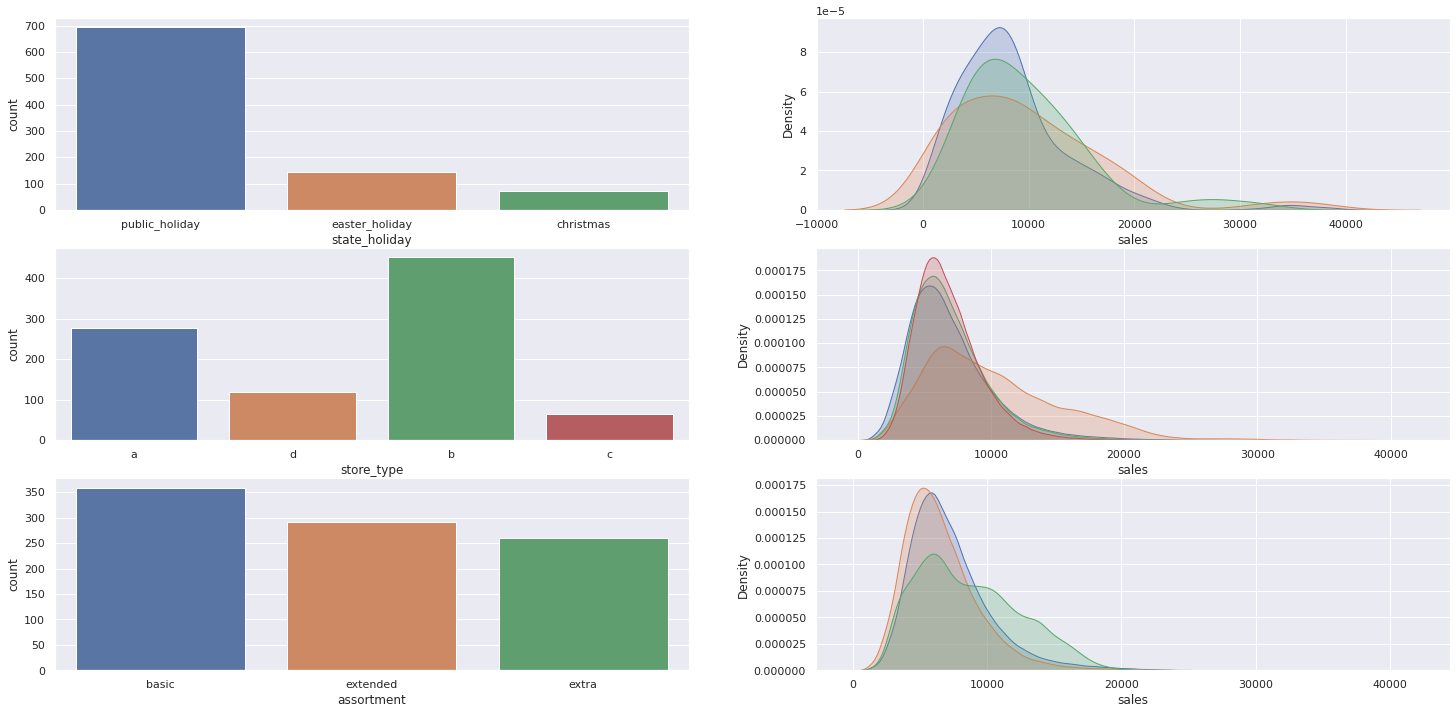

In [56]:
#state holiday
plt.subplot( 3, 2, 1 ) 
aux413 = df4[df4['state_holiday'] != 'regular_day' ]
sns.countplot( aux413['state_holiday'] );

plt.subplot( 3, 2, 2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label = 'public_holiday',shade = True )
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'], label = 'easter_holiday',shade = True )
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label = 'christmas',shade = True );


#state holiday
plt.subplot( 3, 2, 3 ) 
sns.countplot( aux413['store_type'] );



plt.subplot( 3, 2, 4 )
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label = 'a',shade = True )
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label = 'b',shade = True )
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label = 'c',shade = True )
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label = 'd' ,shade = True )

#state holiday
plt.subplot( 3, 2, 5 )
sns.countplot( aux413['assortment'] );



plt.subplot( 3, 2, 6 )
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label = 'extended',shade = True )
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label = 'basic',shade = True )
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label = 'extra',shade = True );



## 4.2  Bivariate Analysis

### **H1.** Stores with a larger assortment should sell more on average.
###  **True**


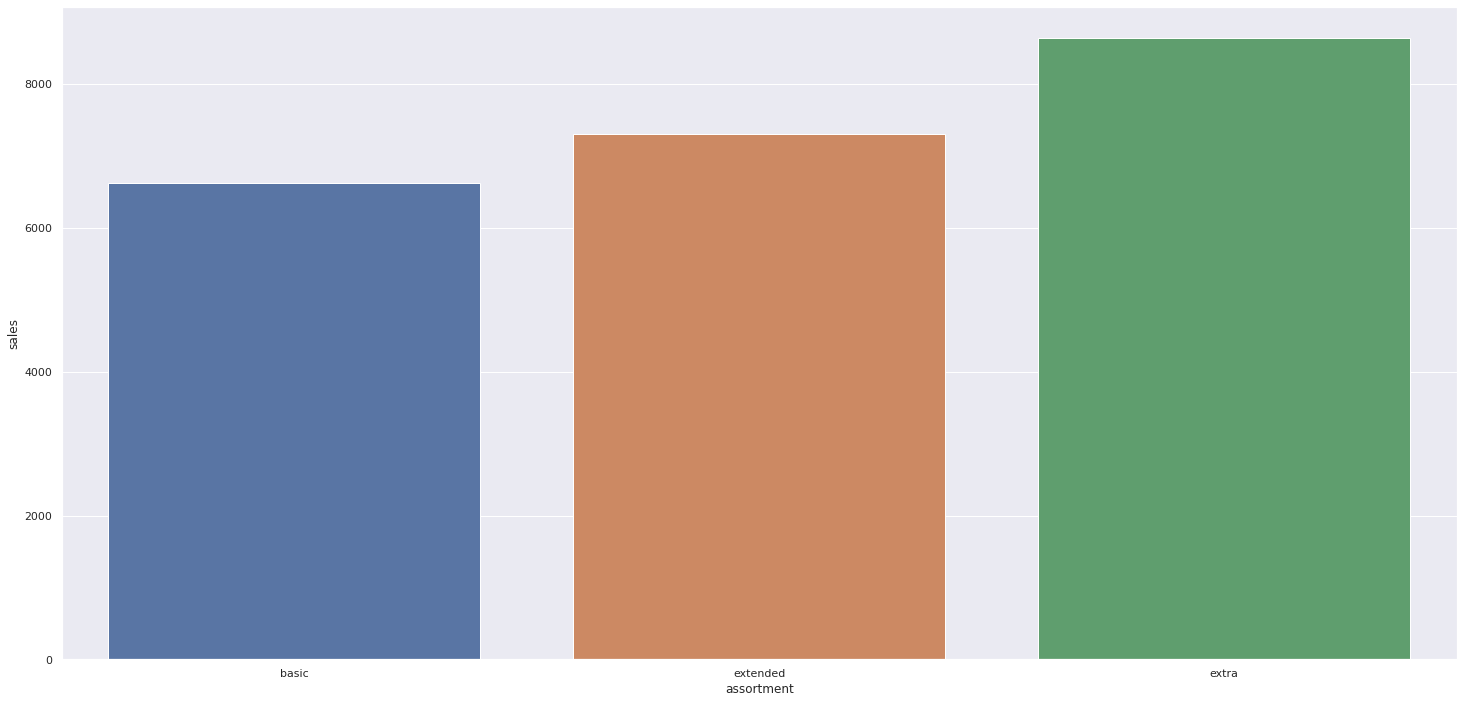

In [59]:
auxh1 = df4[['assortment','sales']].groupby( 'assortment' ).mean().reset_index()

sns.barplot(x='assortment' , y= 'sales', data= auxh1 );


### **H2.** Stores with closer competitors should sell less.
### **False**



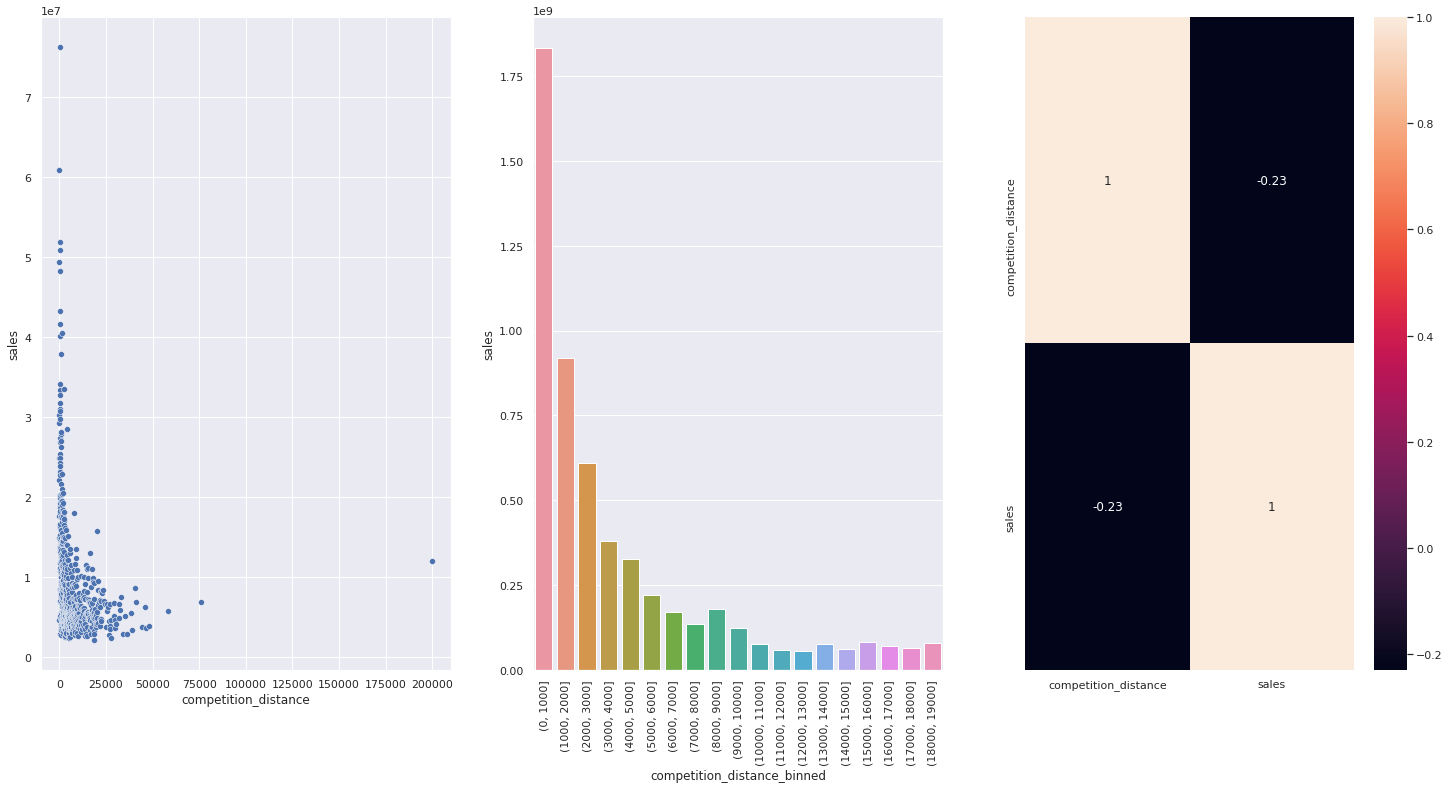

In [95]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()

plt.subplot( 1, 3, 1 )
sns.scatterplot( x ='competition_distance', y='sales', data=aux1 );

plt.subplot( 1, 3, 2 )
bins = list( np.arange( 0, 20000, 1000) )
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins )
aux2 = aux1[['competition_distance_binned', 'sales']].groupby( 'competition_distance_binned' ).sum().reset_index()
sns.barplot( x='competition_distance_binned', y='sales', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( 1, 3, 3 )
x = sns.heatmap( aux1.corr( method='pearson' ), annot=True );

### **H3.** Stores with longer competitors should sell more.
### **False**


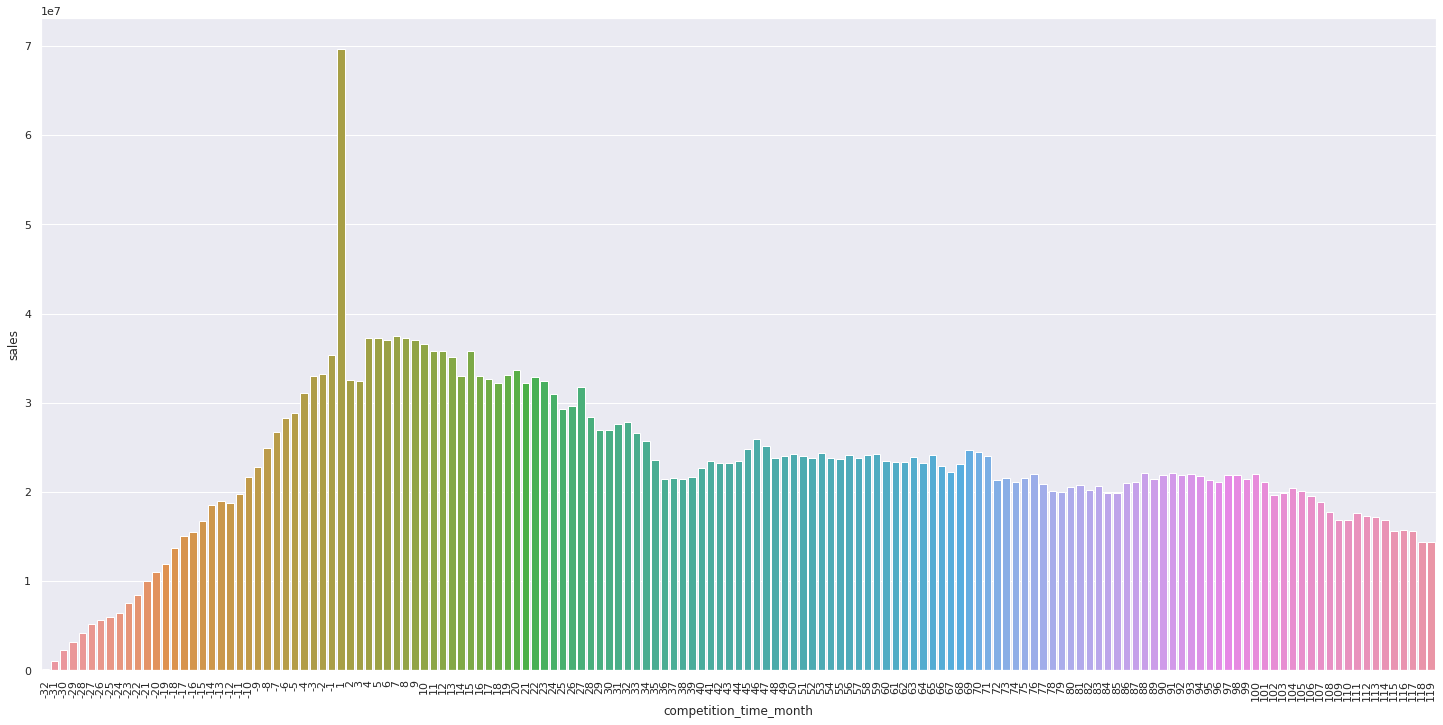

In [98]:
aux3 = df4[['competition_time_month','sales']].groupby( 'competition_time_month').sum().reset_index()
aux4 = aux3[( aux3['competition_time_month'] < 120 ) & (aux3['competition_time_month'] != 0 )]
sns.barplot( x = 'competition_time_month', y='sales', data=aux4 );
plt.xticks(rotation= 90);



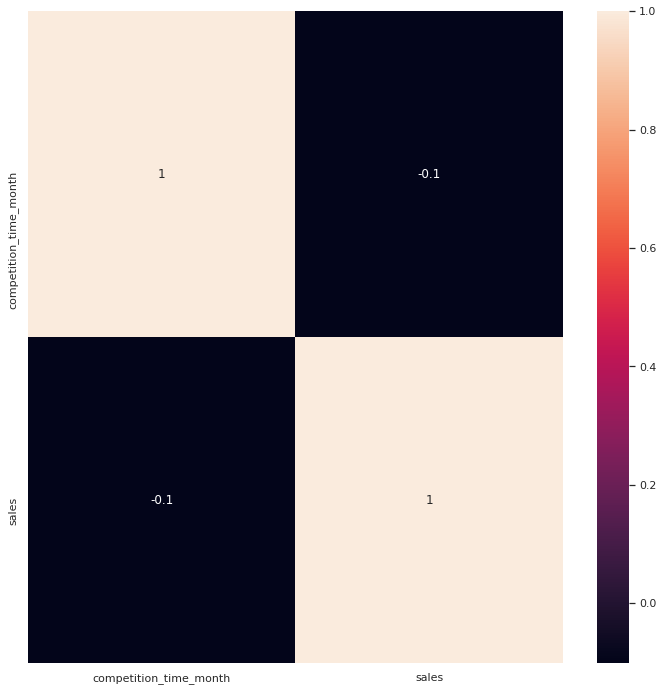

In [102]:
plt.figure( figsize=(12,12))
sns.heatmap( aux3.corr(method='pearson'), annot=True );

### **H4.** Stores with active promotions for longer should sell more.
### **False**


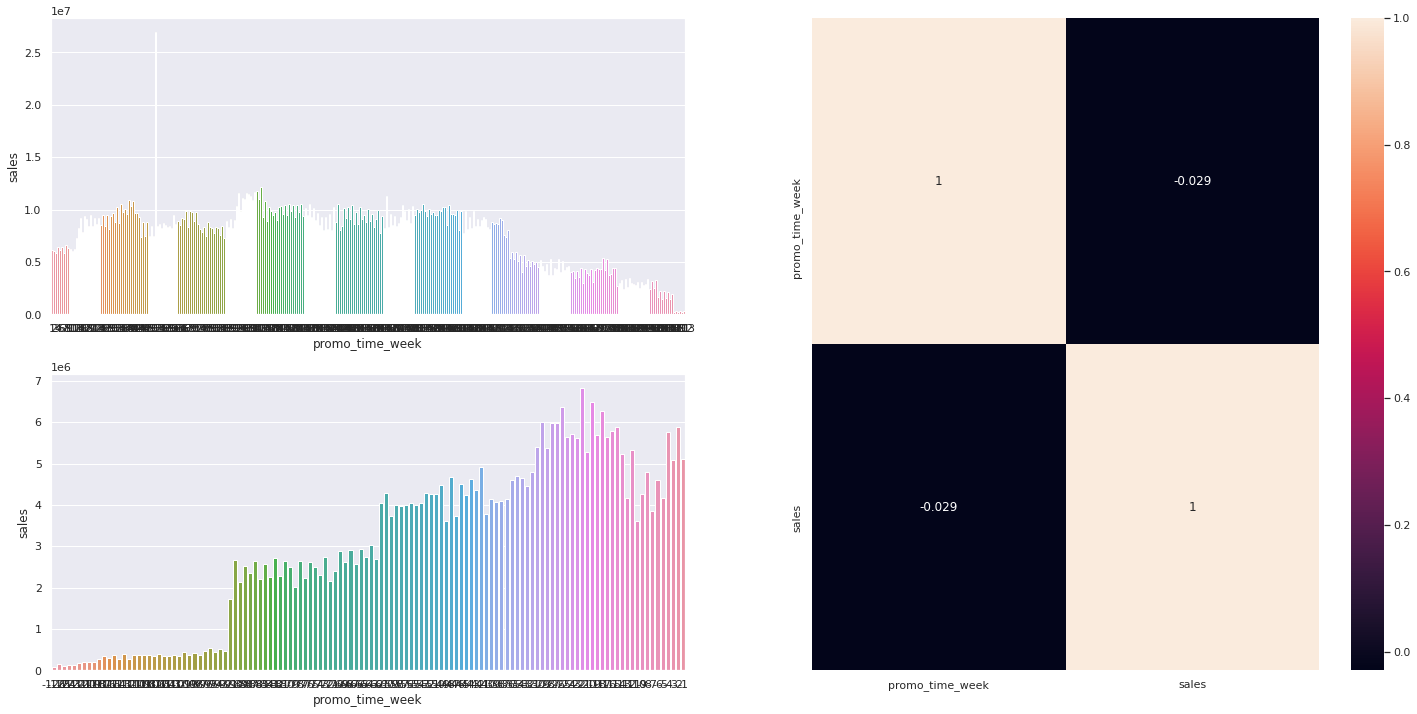

In [114]:
aux4 = df4[['promo_time_week','sales']].groupby( 'promo_time_week' ).sum().reset_index()

grid = GridSpec(2,2)
plt.subplot( grid[0,0] )
#extended promotion
aux2 = aux4[aux4['promo_time_week'] > 0 ]
sns.barplot( x='promo_time_week' , y='sales', data=aux2);

plt.subplot( grid[1,0] )
#regular promotion
aux3 = aux4[aux4['promo_time_week'] < 0 ]
sns.barplot( x='promo_time_week' , y='sales', data=aux3);

plt.subplot( grid[:, 1 ]  )

sns.heatmap(aux4.corr(method='pearson'), annot=True);

### <s> **H5.** Stores with more days of promotion should sell more. <s/>

### **H6.** Stores with more consecutive promotions should sell more.


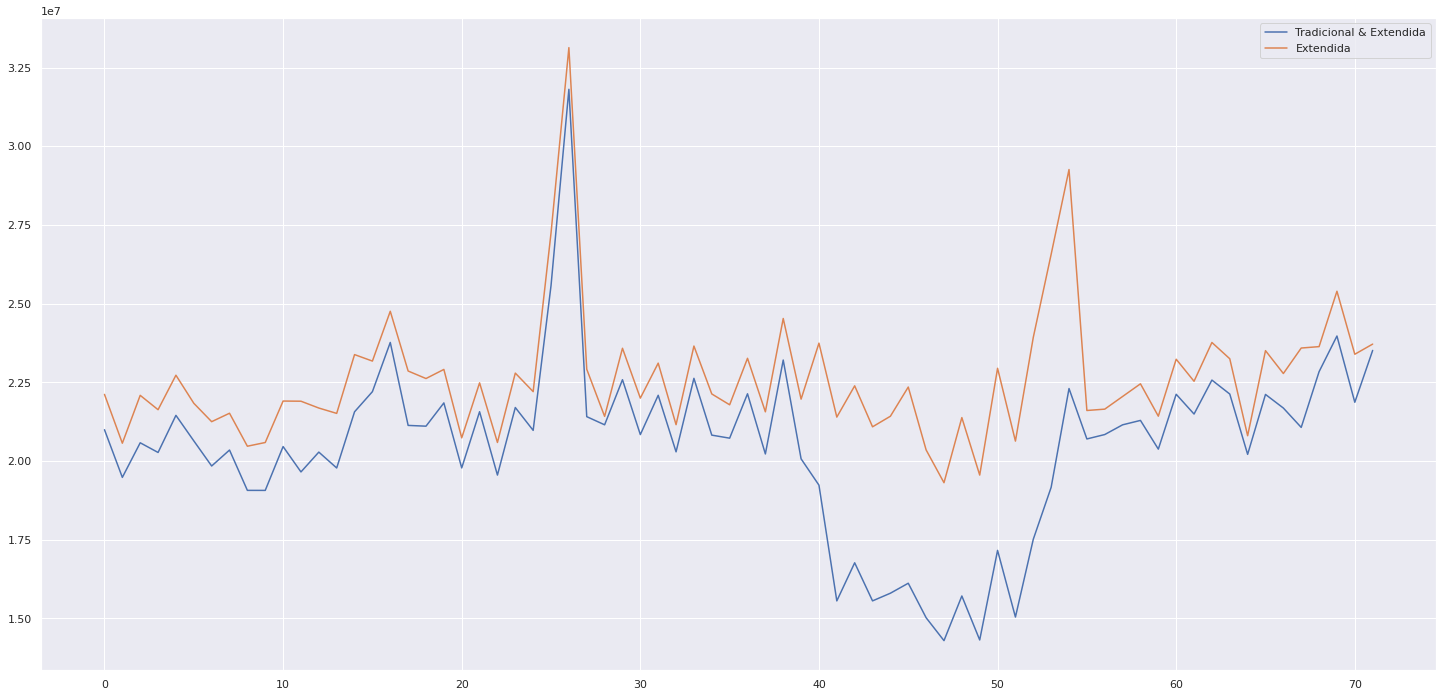

In [116]:
aux1 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 1 )][['year_week', 'sales']].groupby( 'year_week' ).sum().reset_index()
ax = aux1.plot()

aux2 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 0 )][['year_week', 'sales']].groupby( 'year_week' ).sum().reset_index()
aux2.plot( ax=ax )

ax.legend( labels=['Tradicional & Extendida', 'Extendida']);

## 4.3  Multivariate Analysis